# Part1 Read Pickle File

In [1]:
import pandas as pd
import numpy as np
import math
unpickled_df = pd.read_pickle("test_emb.pkl")  
unpickled_df2 = pd.read_pickle("train_emb.pkl")
unpickled_df3 = pd.read_pickle("dev_emb.pkl")
unpickled_df4 = pd.read_pickle("unlabeled_emb.pkl")


# Part2 Train data set with different models

In [2]:
#x_train = unpickled_df2.iloc[:, 0].values
from sklearn.linear_model import LogisticRegression
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import BernoulliNB
knn = KNeighborsClassifier(n_neighbors=1)


gnb_accs = []
gnb = GaussianNB()
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_test_unlabel=[]
no_label = []
dev_embed_AAE=[]
dev_embed_AAE_Label=[]
dev_embed_SAE=[]
dev_embed_SAE_Label=[]
dev_tfidf_AAE=[]
dev_tfidf_AAE_Label=[]
dev_tfidf_SAE=[]
dev_tfidf_SAE_Label=[]
trainTF=[]
trainTFLabel=[]
#print(unpickled_df2["Sentiment"].values[0])
for x in unpickled_df2["TFIDF"]:
    x_train.append(x)
for x in unpickled_df2["Sentiment"]:
    y_train.append(x)
for x in unpickled_df3["TFIDF"]:
    x_test.append(x)
for x in unpickled_df3["Sentiment"]:
    y_test.append(x)
for x in unpickled_df4["Sentiment"]:
    no_label.append(x)
for x in unpickled_df4["TFIDF"]:
    x_test_unlabel.append(x)

train_embed = pd.DataFrame(unpickled_df2.TFIDF.to_list())
unlabeltrain = pd.DataFrame(unpickled_df4.TFIDF.to_list())
for index, row in unpickled_df3.iterrows():
    if row['Demographic']=="AAE":
        dev_embed_AAE.append(row['TFIDF'])
        dev_embed_AAE_Label.append(row['Sentiment'])
    if row['Demographic']=="SAE":
        dev_embed_SAE.append(row['TFIDF'])
        dev_embed_SAE_Label.append(row['Sentiment'])

nolabel = [-1 for _ in range(len(unpickled_df4['Sentiment']))]
lgr = LogisticRegression(max_iter=1000)
lgr.fit(x_train,y_train)
pred1 = lgr.predict(x_test)
precision = precision_score(y_test,pred1,average='macro')
recall = recall_score(y_test,pred1,average='macro')
gnb.fit(x_train,y_train)
knn.fit(x_train, y_train)
pred2 = gnb.predict(x_test)
precision2 = precision_score(y_test,pred2,average='macro')
recall2 = recall_score(y_test,pred2,average='macro')
pred3 = knn.predict(x_test)
precision3 = precision_score(y_test,pred3,average='macro')
recall3 = recall_score(y_test,pred3,average='macro')

for i in range(1,20):
    testknn = KNeighborsClassifier(n_neighbors=i)
    testknn.fit(x_train,y_train)
    diff=testknn.score(dev_embed_SAE,dev_embed_SAE_Label)-testknn.score(dev_embed_AAE,dev_embed_AAE_Label)
    #print(diff)
for i in range(1,10):
    testlgr = LogisticRegression(max_iter=1000,C=float(i))
    testlgr.fit(x_train,y_train)
    diff=testlgr.score(dev_embed_SAE,dev_embed_SAE_Label)-testlgr.score(dev_embed_AAE,dev_embed_AAE_Label)
    #print(diff)
print("Accuracy,precision,recall for logic regression:",lgr.score(x_test,y_test),precision,recall)
print("Accuracy,precision,recall for Gaussian naive bayes:", gnb.score(x_test, y_test),precision2,recall2)
print("Accuracy,precision,recall for KNN:", knn.score(x_test, y_test),precision3,recall3)




0.0675
0.0675
0.06700000000000006
0.0665
0.06600000000000006
0.0665
0.0665
0.06600000000000006
0.0665
Accuracy,precision,recall for logic regression: 0.69825 0.6985442922772279 0.69825
Accuracy,precision,recall for Gaussian naive bayes: 0.61475 0.6181032160354835 0.6147499999999999
Accuracy,precision,recall for KNN: 0.621 0.6210146427717753 0.621


# Part3 Calculate Accuracy for AAE and SAE group with different models

In [3]:
print("Accuracy for Gaussian naive bayes on SAE:", gnb.fit(x_train,y_train).score(dev_embed_SAE,dev_embed_SAE_Label ))
print("Accuracy for Gaussian naive bayes on AAE:", gnb.fit(x_train,y_train).score(dev_embed_AAE,dev_embed_AAE_Label ))
print("Accuracy for KNN on SAE:", knn.fit(x_train,y_train).score(dev_embed_SAE,dev_embed_SAE_Label ))
print("Accuracy for KNN on AAE:", knn.fit(x_train,y_train).score(dev_embed_AAE,dev_embed_AAE_Label ))
print("Accuracy for Logic regression on SAE:", lgr.fit(x_train,y_train).score(dev_embed_SAE,dev_embed_SAE_Label ))
print("Accuracy for Logic regression on AAE:", lgr.fit(x_train,y_train).score(dev_embed_AAE,dev_embed_AAE_Label ))


Accuracy for Gaussian naive bayes on SAE: 0.652
Accuracy for Gaussian naive bayes on AAE: 0.5775
Accuracy for KNN on SAE: 0.6485
Accuracy for KNN on AAE: 0.5935
Accuracy for Logic regression on SAE: 0.732
Accuracy for Logic regression on AAE: 0.6645


# Part4 Show the gap between AAE and SAE group in Naive Bayes

<BarContainer object of 3 artists>

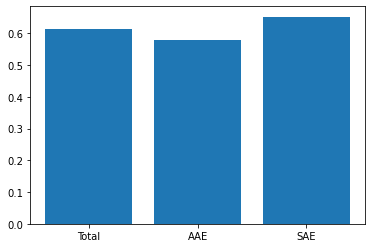

In [4]:
import matplotlib.pyplot as plt
plt.bar(["Total","AAE","SAE"],[gnb.score(x_test, y_test),gnb.score(dev_embed_AAE,dev_embed_AAE_Label ),gnb.score(dev_embed_SAE,dev_embed_SAE_Label )])

# Part4.1Show the gap between AAE and SAE group in logic Regression

<BarContainer object of 3 artists>

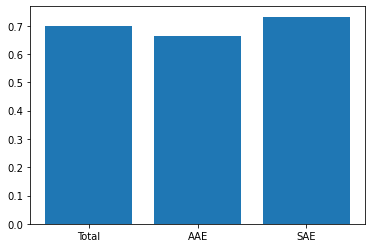

In [5]:
import matplotlib.pyplot as plt
plt.bar(["Total","AAE","SAE"],[lgr.score(x_test, y_test),lgr.score(dev_embed_AAE,dev_embed_AAE_Label ),lgr.score(dev_embed_SAE,dev_embed_SAE_Label )])

# Part4.2Show the gap between AAE and SAE group in Knn model

<BarContainer object of 3 artists>

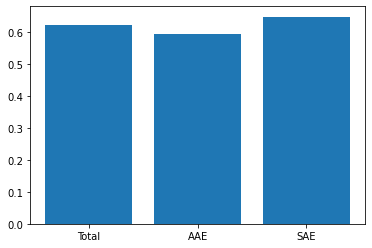

In [6]:
import matplotlib.pyplot as plt
plt.bar(["Total","AAE","SAE"],[knn.score(x_test, y_test),knn.score(dev_embed_AAE,dev_embed_AAE_Label ),knn.score(dev_embed_SAE,dev_embed_SAE_Label )])

# Part5 train the data in test file and save it as csv file

In [7]:
test_embed = pd.DataFrame(unpickled_df.TFIDF.to_list())
kaggle = lgr.predict(test_embed)
df = pd.DataFrame(kaggle,columns=['Category'])
df.to_csv("Submission",index_label="Id")